## Neuroscience 299: Computing with HD-vectors
### Alexander Belsten - Assignment 1
### September 8th, 2021

1. *Why high dimensions? What is the purpose of using high-dimensional vectors? Why might it make sense to select vectors randomly? Explain your answer in about a paragraph.*

The purpose of using HD vectors is because they serve as a distributed-population code. This goes against a compact code, a building block in the Von Neumann computing architecture. It is desirable because errors in the code (bit-flips) have a lesser effect. It makes sense to select vectors randomly because you want them to be from all different locations within the coding space, and thus unsimilar.

2. *Plotting pseudo-orthogonality. For binary vectors {0,1}N, let d(x,y), the normalized Hamming between two vectors x, y, be defined as:*
$$ dist_{ham}(\mathbf{x}, \mathbf{y}) = \frac{1}{N} | \mathbf{x}-\mathbf{y} | $$

*Plot the distribution of cosine similarity for i.i.d. random bipolar vectors {-1,+1}N in each of the following cases: N = 101, 102, 103, and 104. You can obtain the plot by first randomly drawing several thousand pairs of x and y, calculating their cosine similarity, and fitting the normal distribution to the histogram of the observed cosine similarities. Do you see the results, which resemble the figure above?*

Cosine similarity is defined as angle between the two vectors:
$$ \phi_{cos}(\mathbf{x}, \mathbf{y}) = \frac{\mathbf{x}\cdot \mathbf{y}}{||\mathbf{x}|| \ ||\mathbf{y}||} $$

In [52]:
import numpy as np
from matplotlib import pyplot as plt

def cosine_similarity(x, y):
    # assume that x, y \in \mathcal{R}^{N\times 1} 
    return (x.T@y)/np.multiply(np.linalg.norm(x,ord=2,axis=0),np.linalg.norm(x,ord=2,axis=0))

def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*np.pi*var)**.5
    num = np.exp(-np.square(x-float(mean))/(2*var))
    return num/denom

N = np.asarray([10e1, 10e2, 10e3, 10e4],  dtype=np.int)
m = 1000

similarities = np.zeros(shape=(N.size,m**2))

for i in range(N.size):
    for j in range(m):
        X = np.random.choice([-1,1], size=(N[i],1))
        Y = np.random.choice([-1,1], size=(N[i],1))
        similarities[i,j] = cosine_similarity(X, Y)


<IPython.core.display.Javascript object>


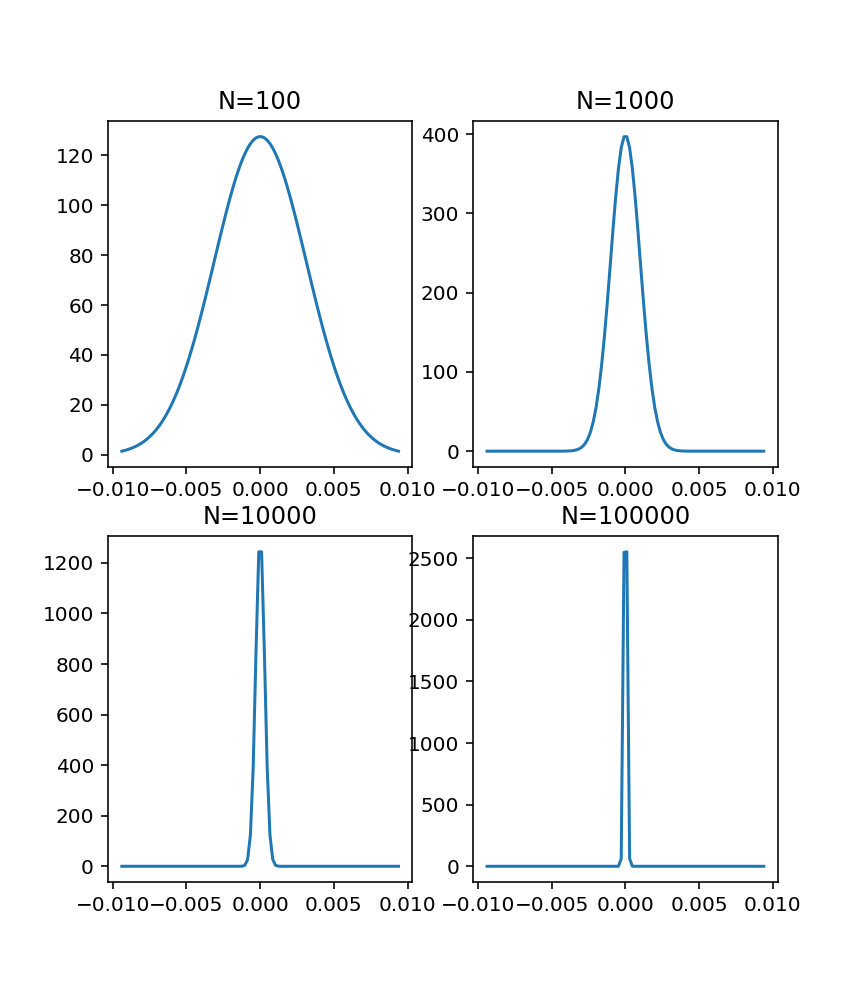

In [54]:
%matplotlib notebook
plt.rcParams["figure.figsize"]=6,7

means = np.mean(similarities, axis=1)
stds  = np.std(similarities, axis=1)
n_pts = 100
x = np.linspace(-3*np.max(stds), 3*np.max(stds), n_pts)
for i in range(N.size):
   
    ax = plt.subplot(2, 2, i+1)
    ax.plot(x, normpdf(x, means[i],stds[i]))
    ax.set_title('N=%d' % N[i])

This figure resembles the one seen from Kanerva, *Sparse Distributed Memory* p.20, as the distribution kertosis increases with dimensionality

3. *Implementing basic HDC/VSA operations.*

*(a) For bipolar {-1,+1} vectors, recreate the following three functions corresponding to the basic operations of HDC/VSA:*

<code>def bind(vector1,vector2):
          #your code here
          return bound_vector</code>
    
<code>def bundle(vector1,vector2):
          #your code here
          return bundled_vector</code>
    
<code>def permutation(vector1):
          #your code here
          return permuted_vector</code>


In [12]:
def bind(vector1,vector2):
    bound_vector = np.multiply(vector1, vector2)
    return bound_vector

def bundle(vector1,vector2):
    bundled_vector = vector1+vector2
    return bundled_vector

def permutation(vector1):
    permuted_vector = np.roll(vector1, 1)
    return permuted_vector

*(b) Demonstrate that the bundling operation is similarity-preserving, whereas the binding and permutation operations are not.*

Lets start with bundling. To demonstrate that bundling preserves similiarity, well bundle our $ \mathbf{x} $ and $ \mathbf{y} $ to produce $\mathbf{z} := \mathbf{x}+\mathbf{y} $ random vectors and check how similar $ \mathbf{z}$ is to $ \mathbf{x}$ and $ \mathbf{y}$.

Note: let $N=10,000$

In [21]:
x_similarities_bundle = np.zeros((m,1))
y_similarities_bundle = np.zeros((m,1))

n = 10000
for i in range(m):
    X = np.random.choice([-1,1], size=(n,1))
    Y = np.random.choice([-1,1], size=(n,1))
    Z = bundle(X,Y)
    x_similarities_bundle[i] = cosine_similarity(X,Z)
    y_similarities_bundle[i] = cosine_similarity(Y,Z)

<IPython.core.display.Javascript object>


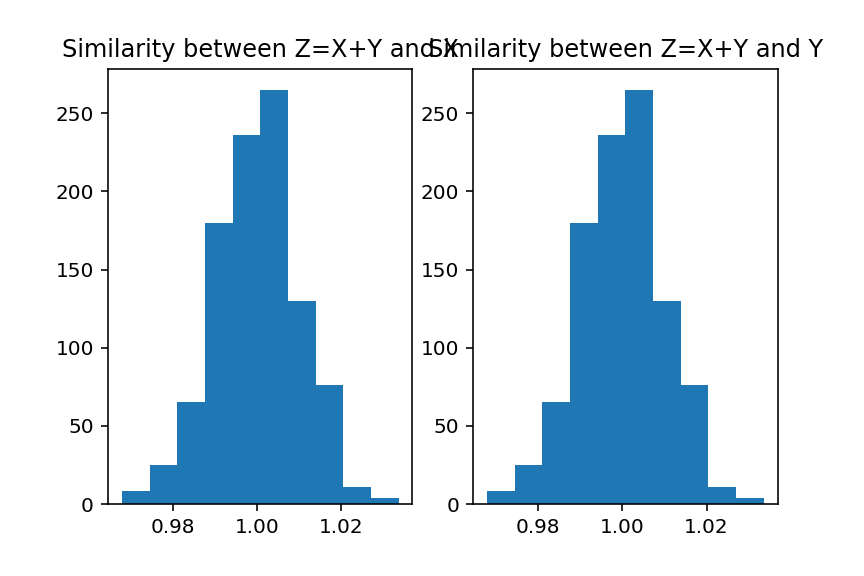

Text(0.5, 1.0, 'Similarity between Z=X+Y and Y')

In [49]:
%matplotlib notebook
plt.rcParams["figure.figsize"]=6,4

ax = plt.subplot(1, 2, 1)
ax.hist(x_similarities_bundle)
ax.set_title('Similarity between Z=X+Y and X')

ax = plt.subplot(1, 2, 2)
ax.hist(y_similarities_bundle)
ax.set_title('Similarity between Z=X+Y and Y')

Both $\mathbf{x}$ and $\mathbf{y}$ HD vectors are very similar to thier bundled values, as the similarity is close to one (which corresponds to parallelness in the HD space).

Next, lets do the same thing for the binding operation:

In [23]:
x_similarities_bind = np.zeros((m,1))
y_similarities_bind = np.zeros((m,1))

n = 10000
for i in range(m):
    X = np.random.choice([-1,1], size=(n,1))
    Y = np.random.choice([-1,1], size=(n,1))
    Z = bind(X,Y)
    x_similarities_bind[i] = cosine_similarity(X,Z)
    y_similarities_bind[i] = cosine_similarity(Y,Z)

<IPython.core.display.Javascript object>


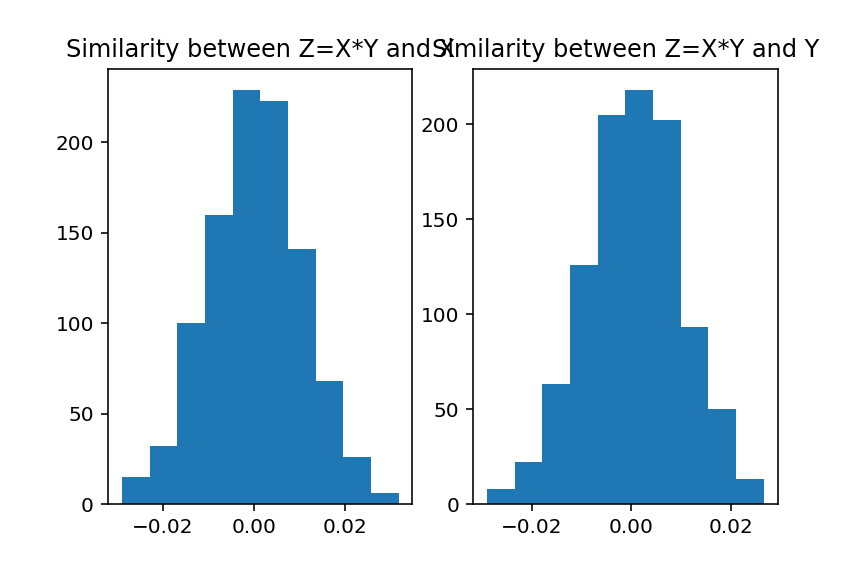

Text(0.5, 1.0, 'Similarity between Z=X*Y and Y')

In [48]:
%matplotlib notebook
plt.rcParams["figure.figsize"]=6,4
ax = plt.subplot(1, 2, 1)
ax.hist(x_similarities_bind)
ax.set_title('Similarity between Z=X*Y and X')

ax = plt.subplot(1, 2, 2)
ax.hist(y_similarities_bind)
ax.set_title('Similarity between Z=X*Y and Y')

The resulting HD vector to the binding operation are very dissimilar becuase their similarities are concentrated around zero (orthogonal in HD space).

Lastly, lets do the same thing for the permutation operation:

In [25]:
x_similarities_perm = np.zeros((m,1))

n = 10000
for i in range(m):
    X = np.random.choice([-1,1], size=(n,1))
    Z = permutation(X)
    x_similarities_perm[i] = cosine_similarity(X,Z)

<IPython.core.display.Javascript object>


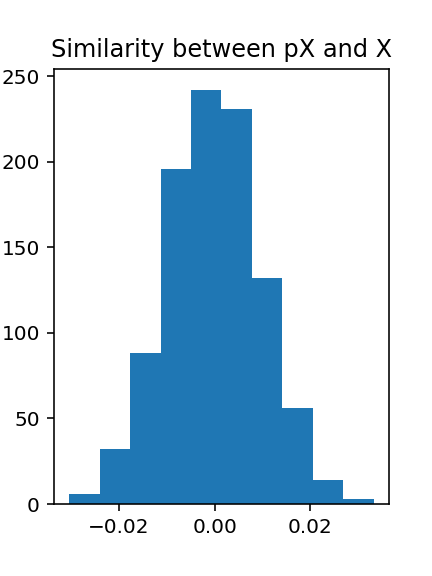

Text(0.5, 1.0, 'Similarity between pX and X')

In [46]:
%matplotlib notebook
plt.rcParams["figure.figsize"]=3,4

plt.hist(x_similarities_perm)
plt.title('Similarity between pX and X')

As expected, the similarity values are concentrated around zero, thus permutation does not maintain similarity. 

(c) Assume that your codebook includes 5 random bipolar vectors $\{ \mathbf{a},\mathbf{b},\mathbf{c},\mathbf{d},\mathbf{e} \}$.
Form the compositional vector z of the following form $\mathbf{z=a+a+a+b+b+c}$.

Plot the histogram of cosine similarities between $ \mathbf{z}$ and $\{ \mathbf{a,b,c,d,e}\} $that is averaged over several random initializations of the codebook. What regalities do you observe?

In [35]:
n_iterations = 1000
vectors      = ['a', 'b', 'c', 'd', 'e']

similarities_bind = np.zeros((n_iterations, len(vectors)))

for i in range(n_iterations):
    a = np.random.choice([-1,1], size=(n,1))
    b = np.random.choice([-1,1], size=(n,1))
    c = np.random.choice([-1,1], size=(n,1))
    d = np.random.choice([-1,1], size=(n,1))
    e = np.random.choice([-1,1], size=(n,1))
    
    HD_vectors = [a, b, c, d, e]
    
    z = bundle(a, bundle(a, bundle(a, bundle(b, bundle(b, c)))))
    
    for j in range(len(HD_vectors)):
        similarities_bind[i,j] = cosine_similarity(z,HD_vectors[j])


<IPython.core.display.Javascript object>


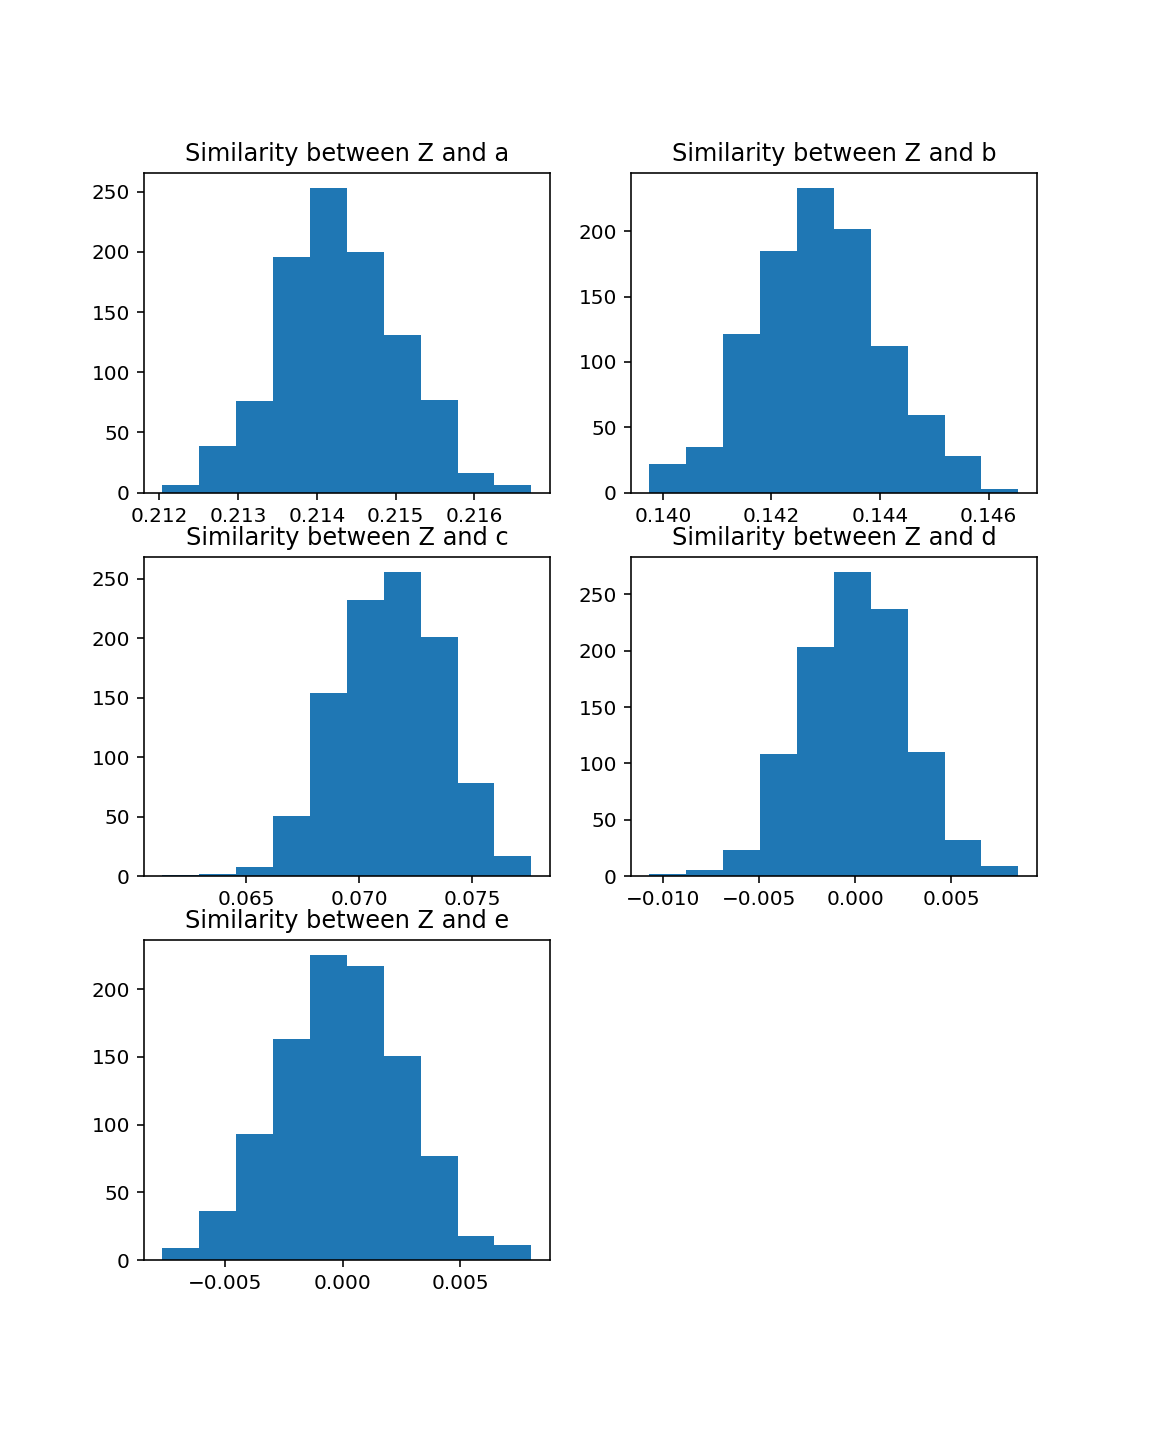

In [55]:
%matplotlib notebook
plt.rcParams["figure.figsize"]=8,10
for i in range(len(vectors)):
    ax = plt.subplot(3, 2, i+1)
    ax.hist(similarities_bind[:,i])
    ax.set_title('Similarity between Z and %s' % vectors[i])

Observations: The resulting vector is by far the most similar to $\mathbf{a}$, followed by $\mathbf{b}$, and slightly similar to $\mathbf{c}$. It is not similar to $\mathbf{d}$ or $\mathbf{e}$. This is expected because $\mathbf{z}$ is composed of $\mathbf{a}$, $\mathbf{b}$, $\mathbf{c}$ through the bundling operation which preserves similarity.